Confidential: Property of the Data Jedi Academy, unauthorised distribution not allowed

<img align="left" src = "DATA-JEDI logo.png" width="200" height="60">

## Data Preprocessing: Basic Introduction

### Introduction
Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.  [Data Preprocessing](https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/)



Content

1. Missing Values
2. Outliers
3. Scaling and Standardisation (will be covered under feature engineering)

### Dataset

#### Importing the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset below contains 200 synthetic records of human height, weight and age of young adults (between 18 and 35 years old)

In [2]:
df = pd.read_csv('Preprocessing Tutorial Data.csv')

In [3]:
df.describe()

,Height(cm),Weight(kg),Age
count,196.000000,197.000000,195.000000
mean,169.357143,66.918782,28.205128
std,22.872557,15.849854,17.603566
min,10.000000,14.000000,5.000000
25%,169.000000,61.000000,20.000000
50%,172.000000,66.000000,26.000000
75%,176.000000,71.000000,31.000000
max,188.000000,170.000000,150.000000


In [4]:
df.head()

,Height(cm),Weight(kg),Age
0,167.0,59.0,35.0
1,182.0,65.0,34.0
2,176.0,77.0,26.0
3,173.0,76.0,20.0
4,172.0,73.0,23.0


### 1. Missing Values

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification. 
[Treating missing values](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two)


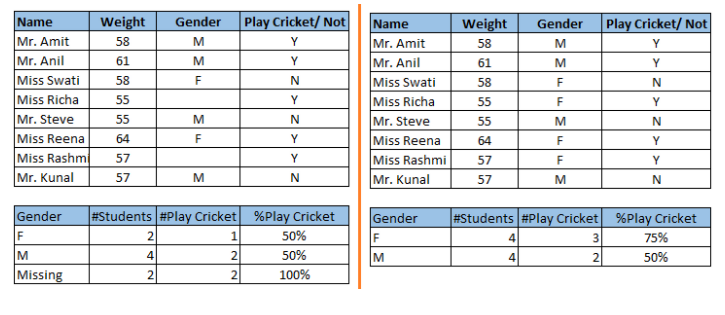

Notice the missing values in the image shown above: In the left scenario, we have not treated missing values. The inference from this data set is that the chances of playing cricket by males is higher than females. On the other hand, if you look at the second table, which shows data after treatment of missing values (based on gender), we can see that females have higher chances of playing cricket compared to males.

We looked at the importance of treatment of missing values in a dataset. Next, we will look at the following:

1. Why We have missing values
2. Missing value Identification
3. Missing value Treatment

#### 1. Why We have missing values

Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

#### i. Data Extraction:
It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.

#### ii. Data collection: 
These errors occur at time of data collection and are harder to correct. They can be categorized in four types:

#### a. Missing completely at random: 
This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.

#### b. Missing at random: 
This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.

#### c. Missing that depends on unobserved predictors: 
This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.

#### d. Missing that depends on the missing value itself: 
This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.


#### 2. Missing value identification

Missing values can be identified in a pandas dataframe using the isnull() method in the code below. Missing values can be identified in rows marked as True.

In [5]:
df.isnull()

,Height(cm),Weight(kg),Age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
195,False,False,False
196,False,False,False
197,False,False,False
198,False,False,False


Subsetting df using isnull() and any() methods gives the missing values themselves. As seen below, this is typically preferable. [Python Any method](https://www.studytonight.com/pandas/pandas-dataframe-any-method) 

Also, a count of missing values can be obtained by using the sum() method along with df.isnull() as highlighted below

In [6]:
df[df.isnull().any(axis=1)]

,Height(cm),Weight(kg),Age
26,180.0,67.0,NaN
56,NaN,71.0,34.0
61,175.0,62.0,NaN
77,166.0,NaN,30.0
87,NaN,71.0,24.0
91,178.0,77.0,NaN
133,NaN,60.0,16.0
137,171.0,NaN,33.0
141,166.0,52.0,NaN
172,NaN,58.0,26.0


In [7]:
df.isnull().sum()

Height(cm)    4
Weight(kg)    3
Age           5
dtype: int64

#### 3. Missing Values Treatment

#### a. Drop
Missing values can be dropped from the dataset. Typically this is the go to method when the dataset has many observations (rows) and the deletion of missing rows will have no significant impact on the overall size. For example in cases where the missing values account for just 2% of data set, they can be easily deleted. However, care must be taken especially with categorical columns. Ensure that deleting missing values doesn't result in a significant imbalance of a categorical column. 

We can drop a row or column with missing values using dropna() method. The axis should be specified as 0 to drop rows. If columns are to be dropped, the axis should be specified as 1.

In [8]:
#count before the drop
df.shape

(200, 3)

In [9]:
df_drop = df.dropna(axis=0)

In [10]:
#count before the drop
df_drop.shape

(188, 3)

#### b. Replace
Missing values can be replaced in the dataset using various inputation methods. This includes using fixed values, averages (median,mean and mode) or prediction model values. This is a more practical approach in cases where the dataset is small and deleting missing values will have a significant impact on the size. 


The fillna() method can be used to achieve this.

In [11]:
df['Height(cm)'].fillna(140, inplace=True)

In [13]:
df_test = df.copy()
median = df_test['Height(cm)'].median()
df_test['Height(cm)'].fillna(median, inplace=True)

In [14]:
df_test.isnull().sum()

Height(cm)    0
Weight(kg)    3
Age           5
dtype: int64

### 2. Outliers 

One of the biggest challenges in data cleaning is the identification and treatment of outliers. In simple terms, outliers are observations that are significantly different from other data points. Even the best machine learning algorithms will underperform if outliers are not cleaned from the data because outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy. [Treating outliers](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)

1. Outlier Identification
2. Outlier Treatment

#### 1. Outlier Identification

There can be many reasons for the presence of outliers in the data. Sometimes the outliers may be genuine, while in other cases, they could exist because of data entry errors. It is important to understand the reasons for the outliers before cleaning them.

#### a. Using describe()

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [15]:
df.describe()

,Height(cm),Weight(kg),Age
count,200.00000,197.000000,195.000000
mean,168.77000,66.918782,28.205128
std,23.01337,15.849854,17.603566
min,10.00000,14.000000,5.000000
25%,168.75000,61.000000,20.000000
50%,172.00000,66.000000,26.000000
75%,176.00000,71.000000,31.000000
max,188.00000,170.000000,150.000000


Looking at the 'Age' variable, it is easy to detect outliers resulting from incorrect data. The minimum and maximum ages are 5, and 150, respectively.

#### b. Identifying Outliers with Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset. [Interquatile range](https://www.mathsisfun.com/data/quartiles.html)

In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11.0


The above output prints the IQR score, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [17]:
print((df['Age'] < (Q1 - 1.5 * IQR)) |(df['Age'] > (Q3 + 1.5 * IQR)))

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Age, Length: 200, dtype: bool


In [18]:
#To subset for only the outliers
df['Age'][(df['Age'] < (Q1 - 1.5 * IQR)) |(df['Age'] > (Q3 + 1.5 * IQR))]

85     150.0
90     120.0
101    100.0
102    143.0
110    125.0
Name: Age, dtype: float64

#### c. Identifying Outliers with Visualization

#### Box plot:
It is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. Outliers are typically seen as circles or dots below the minimum line or above the maximum line.

#### Histogram:
A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. 

#### Scatterplot
A scatterplot visualizes the relationship between two quantitative variables. The data are displayed as a collection of points, and any points that fall outside the general clustering of the two variables may indicate outliers. 

c:\users\ay_de\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

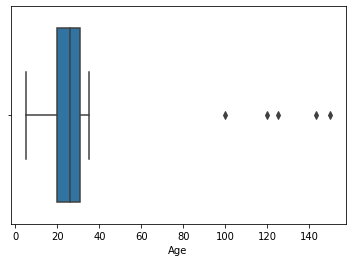

In [19]:
#Boxplot
sns.boxplot(df['Age'])

<AxesSubplot:>

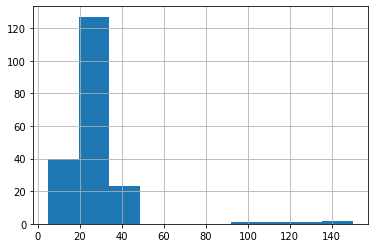

In [20]:
df['Age'].hist()

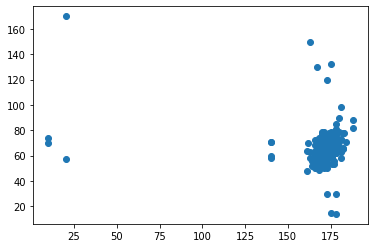

In [21]:
plt.scatter('Height(cm)', 'Weight(kg)',data = df)

#### d. Identifying Multivariate Outliers 

Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height.

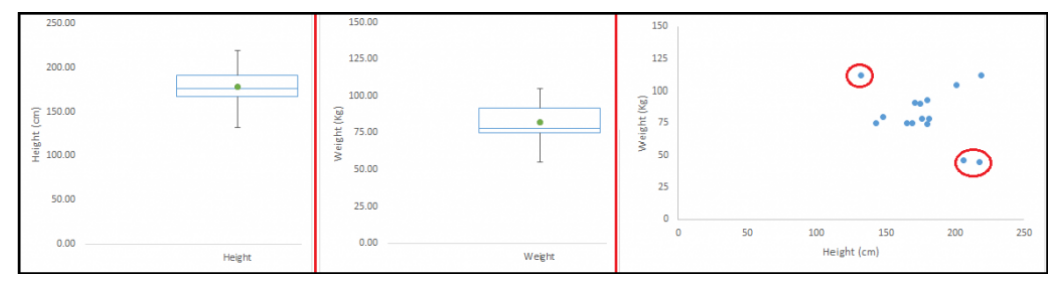

#### 2. Outlier Treatment

In the previous sections, we learned about techniques for outlier detection. However, this is only half of the task. Once we have identified the outliers, we need to treat them. There are several techniques for this, and we will discuss the most widely used ones below.

#### a. Quantile-based Flooring and Capping
In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. Since percentiles are used, this can work well for both large and small datasets. Typically the percentil values need to be <= 10th and > 90th percentile to ensure a lot of data is not lost.

The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping

In [22]:
print(df['Age'].quantile(0.10))
print(df['Age'].quantile(0.90))

18.0
34.0


Now we will remove the outliers, as shown in the lines of code below.

In [23]:
df["Age"][(df["Age"]>=18.0)|(df["Age"]<=34.0)]

0      35.0
1      34.0
2      26.0
3      20.0
4      23.0
       ... 
195    26.0
196    20.0
197    18.0
198    22.0
199    35.0
Name: Age, Length: 195, dtype: float64

#### b. Trimming
In this method, we completely remove data points that are outliers. This works well with large data sets where the outliers do not account for a significant percentage of the data (>10%)

Consider the 'Age' variable, which had a minimum value of 5 and a maximum value of 150. The code below drops any Age below 18 and keeps ages above 18 (Adults) but less than 100. This method typically relies on common knowledge or domain knowledge. Young adults are expected to be between 18 and 35

In [25]:
df["Age"][(df["Age"]>=18.0)&(df["Age"]<=35)]

0      35.0
1      34.0
2      26.0
3      20.0
4      23.0
       ... 
195    26.0
196    20.0
197    18.0
198    22.0
199    35.0
Name: Age, Length: 171, dtype: float64

#### c. IQR Score
This technique uses the IQR scores calculated earlier to remove outliers. This can work well for both large and small datasets similar to the quantile capping.

The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. The first line of code below removes outliers based on the IQR range and stores the result in the data frame 'df_out'. The second line prints the shape of this data, which comes out to be 375 observations of 6 variables. This shows that for our data, a lot of records get deleted if we use the IQR method.

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Height(cm)     7.25
Weight(kg)    10.00
Age           11.00
dtype: float64


In [27]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

,Height(cm),Weight(kg),Age
0,167.0,59.0,35.0
1,182.0,65.0,34.0
2,176.0,77.0,26.0
3,173.0,76.0,20.0
4,172.0,73.0,23.0
...,...,...,...
195,167.0,55.0,26.0
196,168.0,67.0,20.0
197,173.0,73.0,18.0
198,173.0,64.0,22.0


#### d. Replacing Outliers with Median Values
In this technique, we replace the extreme values with median values. This works well especially for small datasets where removing outliers will impact the datasize

It is advised to not use mean values as they are affected by outliers. The first line of code below prints the 50th percentile value, or the median, which comes out to be 140. The second line prints the 95th percentile value, which comes out to be around 326. The third line of code below replaces all those values in the 'Loan_amount' variable, which are greater than the 95th percentile, with the median value. Finally, the fourth line prints summary statistics after all these techniques have been employed for outlier treatment.

In [32]:
print(df['Age'].quantile(0.50)) 
print(df['Age'].quantile(0.95)) 
print(df['Age'].quantile(0.05))

26.0
35.0
16.0


In [36]:
df_test = df.copy()
df_test['Age'][(df_test['Age']<16) | (df_test['Age']>35)] = 26 

In [37]:
df_test.describe()

,Height(cm),Weight(kg),Age
count,200.00000,197.000000,195.000000
mean,168.77000,66.918782,25.897436
std,23.01337,15.849854,5.902974
min,10.00000,14.000000,16.000000
25%,168.75000,61.000000,20.500000
50%,172.00000,66.000000,26.000000
75%,176.00000,71.000000,31.000000
max,188.00000,170.000000,35.000000


.

**Reference materials**
1. [Handling missing values and outliers](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two)
2. [Handling outliers](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)
3. [Quartiles and Interquartile range](https://www.mathsisfun.com/data/quartiles.html)